<a href="https://colab.research.google.com/github/boontarikau/type-of-data-in-statistics/blob/main/Type_of_data_on_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data source:
Data is available in CSV format through the link below:

(https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd)\

Data Provided by: SF Controller's Office italicized text

Dataset Owner: OpenData

The San Francisco Controller's Office maintains a database of the salary and benefits paid to City employees since fiscal year 2013. This data is summarized and presented on the Employee Compensation report from 2013 to 2023 both in fiscal. New data is added on a bi-annual basis when available for each fiscal and calendar year.

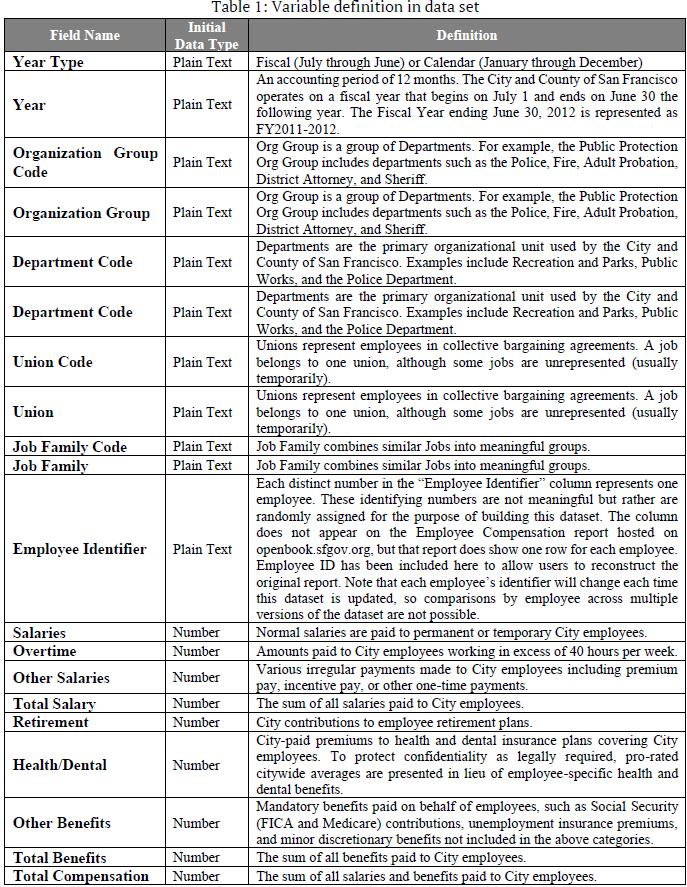

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_original=pd.read_csv('/content/drive/MyDrive/analysis/stats/Copy of Employee_Compensation (1).csv')

In [ ]:
#over view tha data
df_original.head()

In [ ]:
#show the rows and columns of the data set
df_original.shape

In [ ]:
#find out null value
display(df_original.isnull().sum())

Since, there are only  Department Cod= 2 ,Department=	2, Union Code	=180,Union	=179, Job	= 5 and to compare with 881800 rows. There are less and we can remove them

In [ ]:
#delete null value
df = df_original.dropna()
display(df.shape)

In [ ]:
#type of each columns
df.dtypes

In [ ]:
#data type casting: change data type into numeric data
numeric_columns=['Salaries','Overtime','Other Salaries','Total Salary','Retirement','Health and Dental','Other Benefits','Total Benefits','Total Compensation']
for i in df.columns:
  if i not in numeric_columns:
    df[i]=df[i].astype('object')
df.dtypes

In [ ]:
df.describe()

In [ ]:
#seperate fiscal and calendar to analyze the statistical describe
df_f=df[df['Year Type']=='Fiscal']
df_c=df[df['Year Type']=='Calendar']
print (df_f.shape, df_c.shape)

In [ ]:
df_f.describe()

In [ ]:
#from data above, ath salaries can not be negetive amount
df_f[df['Salaries']<0]

In [ ]:
df_f[df_f['Salaries']<0].min()

In [ ]:
df_f[df_f['Salaries']>250000]

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_f['Salaries']).set_title('Box Plot of Salaries', fontsize=15)
plt.show()

In [ ]:
#distribution of salaries data with negative numbers
plt.figure(figsize=(15,8))
sns.distplot(df_f['Salaries'],kde=True,bins=40).set_title(' Histogram of Salaries- with outliers',fontsize=15)
plt.show();

In [ ]:
#remove outlier
def remove_outliers(d):
  for i in d.columns:
    if d[i].dtypes!="object":
      lower_bound=d[i].mean()-3*d[i].std()
      upper_bound=d[i].mean()+3*d[i].std()
      d_I=d[(d[i]>=lower_bound)&(d[i]<=upper_bound)]
      d_O=d[(d[i]<lower_bound)&(d[i]>upper_bound)]
  return d_I

df_f_I=remove_outliers(df_f)
print(df_f_I.shape, df_f.shape)

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(df_f_I['Salaries'],kde=True,bins=40).set_title(' Histogram of Salaries- after removing outliers',fontsize=15)
plt.show();

Feature Engineering

five  years interval

In [ ]:
df_f['Five_years_period'] = ''  # Create a new column with empty values

df_f['Five_years_period'] = 'second_half'  # Set the default value to 'second_half'
df_f.loc[df_f['Year'] <= 2017, 'Five_years_period'] = 'first_half'
df_f.dropna(axis=0)

In [ ]:
display(df_f['Job'].unique())

In [ ]:
print(df_f['Job'].nunique())

In [ ]:
job_segment_mapping = {
    'Community Health': ['Health', 'Medical', 'Nurse', 'Physician', 'Dentist', 'Pharmacy', 'Therapist', 'Epidemiologist', 'Paramedic', 'EMT'],
    'Culture & Recreation': ['Library', 'Museum', 'Park', 'Recreation', 'Cultural', 'Zoo', 'Arts'],
    'General Administration & Finance': ['Clerk', 'Assistant', 'Analyst', 'Manager', 'Director', 'Administrator', 'Accountant', 'Auditor', 'Finance', 'Budget', 'Payroll', 'Secretary', 'Coordinator', 'Officer', 'Specialist', 'Planner', 'Executive', 'Commissioner'],
    'General City Responsibilities': ['City Planning', 'Elections', 'Human Rights', 'Ethics', 'Civil Service', 'Retirement', 'Treasurer', 'Controller', 'Attorney', 'Legal', 'Legislative'],
    'Human Welfare & Neighborhood Development': ['Social Worker', 'Human Services', 'Probation', 'Juvenile', 'Child', 'Youth', 'Aging', 'Disability', 'Homeless', 'Housing', 'Community Development'],
    'Public Protection': ['Police', 'Fire', 'Sheriff', 'Correction', 'Probation', 'Emergency', 'Security', 'Investigation', 'Inspector', 'Forensic'],
    'Public Works, Transportation & Commerce': ['Engineer', 'Transit', 'Transportation', 'Public Works', 'Airport', 'MTA', 'Port', 'Utilities', 'Water', 'Wastewater', 'Street', 'Maintenance', 'Mechanic', 'Operator', 'Planner'],
    'Other': [] # This will be for jobs that don't fit into any of the above categories
}

def assign_job_segment(job_title):
    for segment, keywords in job_segment_mapping.items():
        if segment != 'Other':
            for keyword in keywords:
                if keyword.lower() in job_title.lower():
                    return segment
    return 'Other'

df_f['Job Segment'] = df_f['Job'].apply(assign_job_segment)

# Display the distribution of job segments
display(df_f['Job Segment'].value_counts())

In [ ]:
display(df_f['Job Segment'].unique())

Ploting Graphs

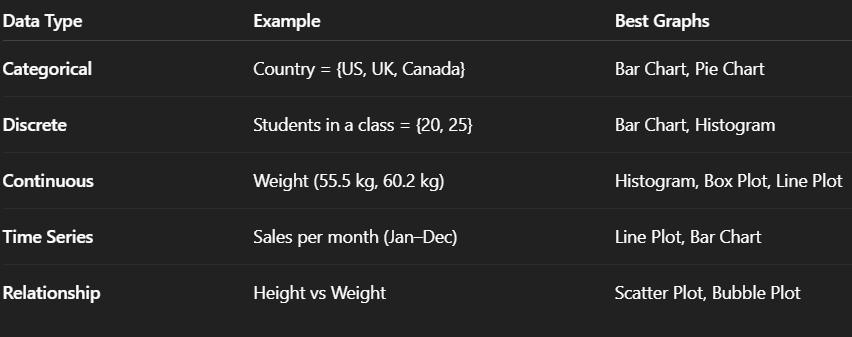

1. Two plots displaying the distribution of a single continuous variable

In [ ]:
# Create Histogram for Total Bebefits
plt.figure(figsize=(15,8))
sns.histplot(df_f['Total Benefits'], bins=30, kde=False)
# Creating Mean and Median Lines
plt.axvline(df_f['Total Benefits'].mean(), color='orange', linestyle='--')
plt.axvline(df_f['Total Benefits'].median(), color='blue', linestyle='-')
# Create and plot Mean and Median Legend
plt.legend({'Mean':df_f['Total Benefits'].mean(),'Median':df_f['Total Benefits'].median()})
# Define Plot Title and Labels
plt.title('Figure 1.1: Distribution of Total Benefits')
plt.xlabel('Total Benefits')
plt.ylabel('Frequency')
plt.show();

Chart Description

Title: Figure 1.1: Distribution of Total Benefits

X-axis (horizontal): Total Benefits (monetary value, ranging from 0 to about 200,000).

Y-axis (vertical): Frequency (number of employees).

Graph Type: Histogram

Variable: Total Benefits (numerical, continuous)

Orange dashed line: Mean (average).

Blue solid line: Median (middle value).

The mean is slightly lower than the median →  left-skewed

The chart shows that most employees get about 30k–40k in benefits, but some low-benefit cases pull the mean below the median, making the distribution left-skewed.


In [ ]:
# Create BoxPlot for Total Benefits
plt.figure(figsize=(15,8))
sns.boxplot(x=df_f['Total Benefits']).set_title('Figure 1.2: Box Plot of Total Benefits', fontsize=15)
plt.show()

Chart Description

Title: Figure 1.2: Box Plot of Total Benefits

X-axis: Total Benefits (0 to ~200,000).

The box plot shows the distribution of data through quartiles and highlights outliers.



Breakdown of the Box Plot

Box (Interquartile Range, IQR):

The thick box represents the middle 50% of employees (from Q1 to Q3).

The vertical line inside the box marks the median (~34,000).

Most employees’ benefits lie roughly between 20,000 and 50,000.

Whiskers:

The horizontal lines extending from the box show the approximate range of “typical” values.

Left whisker: shows some employees with very low benefits.

Right whisker: extends toward higher benefits (~100,000).

Outliers:

Dots to the far right represent employees with unusually high benefits (>100,000).

These are relatively rare but pull the range outward.

The box plot confirms that while most employees have benefits in the 20k–50k range, a small number of employees receive very high benefits, which are marked as outliers. This complements the histogram by showing not just the distribution, but also the quartiles, median, and extreme cases.

2.Two plots displaying information about a single categorical variable

In [ ]:
# create unique data set of employee
unique_employee_count_by_Organization = df_f.groupby('Organization Group')['Employee Identifier'].nunique().reset_index(name='Unique Employee Count')
#bar plot for categorical variable
plt.figure(figsize=(30, 8))
fig = sns.barplot(x='Organization Group', y='Unique Employee Count', data=unique_employee_count_by_Organization, palette='magma', order=unique_employee_count_by_Organization.sort_values(by='Unique Employee Count', ascending=False)['Organization Group'])
fig.set_title('Figure 2.1: Number of Unique Employees in Each Organization Group - Fiscal Year', fontsize=20)

plt.show()
unique_employee_count_by_Organization

Chart Description

Title: Figure 2.1: Number of Unique Employees in Each Organization Group – Fiscal Year

X-axis: Organization Groups (categories).

Y-axis: Unique Employee Count (number of employees).

Each bar shows the total number of unique employees in that organization group during the fiscal year.

This chart shows that most employees work in Public Works, Community Health, and Public Protection, while groups like Culture & Recreation or Human Welfare & Neighborhood Development are smaller in size. It highlights the city’s priorities in infrastructure, health, and safety.

In [ ]:
df_f_Organization_Group = df_f['Organization Group'].value_counts()
df_f_Organization_Group_per = df_f_Organization_Group/len(df_f)*100
plt.figure(figsize=(10,6))
colors = sns.color_palette("deep")
plt.pie(df_f_Organization_Group_per,labels =df_f_Organization_Group_per.index,colors=colors,autopct ='%1.2f%%')
plt.title('Figure 2.2: The Percentage of Each section in Organization Group')
plt.show()


Chart Description

Title: Figure 2.2: The Percentage of Each Section in Organization Group

Type: Pie Chart (proportional distribution).

Each slice represents the percentage share of employees in that group.

The pie chart visually confirms the unequal distribution of employees across organization groups: about one-third in Public Works, one-fifth in Community Health, another one-fifth in Public Protection, and the rest spread across smaller administrative and service categories.

3.one plot displaying information about both a continuous variable and a categoricalvariable

In [ ]:
# Create Line Graph for Total Salary by Year
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Total Salary', data= df_f, ci=None)
plt.title('Figure 3.1: Line Graph of Total Salary by Year')
plt.show();

Chart Description

Title: Figure 3.1: Line Graph of Total Salary by Year

X-axis: Year (2013–2023).

Y-axis: Total Salary (average or aggregated values, in dollars).

Graph type: Line plot, showing trend over time.

The line chart shows that employee salaries were flat until 2015, then began to rise steadily. Since 2016, there’s been continuous and accelerating growth, with the biggest increases occurring after 2019, pushing average salaries above 110,000 by 2023.

In [ ]:
# Create BoxPlot of Total Salaries and Job Segment
plt.figure(figsize=(15,8))
sns.boxplot(y=df_f['Job Segment'],x=df_f['Total Salary'])
plt.title('Figure 3.2: Boxplot of Total Salaries by Job Segment',fontsize=15)
plt.show();

Chart Description

Title: Figure 3.2: Boxplot of Total Salaries by Job Segment

X-axis: Total Salary (range from negative outliers up to 600,000+).

Y-axis: Job Segments (organization categories, e.g., Community Health, Public Protection).

Each horizontal box shows the salary distribution within that job segment.

Key Insights

Salary structures vary widely across job segments.

Public Protection and Community Health dominate in both median salaries and extreme outliers, suggesting a mix of stable staff and very highly compensated roles.

Culture & Recreation shows the most consistent (and lowest) salaries, which may reflect more uniform pay grades.

The abundance of outliers suggests pay inequality within each group, with a small number of very highly paid employees.

High-paying sectors: Public Protection, Community Health.

Mid-range sectors: General Admin & Finance, Public Works.

Lower-paying sectors: Culture & Recreation, Human Welfare.

This box plot reveals significant salary disparities across job segments. While most employees in each group earn clustered amounts (20k–200k), some roles push salaries far beyond 500k, especially in Public Protection and Community Health. Smaller sectors like Culture & Recreation and Human Welfare have narrower and lower salary ranges, showing less pay variation.

4.two plots should display information that shows a relationship between two variables

In [ ]:
# scatter plot between salary and retirement ()
plt.figure(figsize=(18,5))
plt.scatter(df_f['Salaries'],df_f['Retirement'], color='blue')
plt.title(f'Scatterplot of Salaries and Retirement- Fiscal year', fontsize=15)
plt.xlabel('Salaries')
plt.ylabel('Retirement')

# Draw regression line
model = LinearRegression()
X = df_f['Salaries'].values.reshape(-1, 1)  # Reshape x to make it a 2D array
y = df_f['Retirement']
model.fit(X, y)

# Plot the regression line
plt.plot(df_f['Salaries'], model.predict(X), color='red', linewidth=2)

# Add regression equation text to the plot
equation_text = f'Regression Equation:\nRetirement = {model.coef_[0]:.2f} * Salaries + {model.intercept_:.2f}'
plt.text(0.5, 0.9 * df_f['Retirement'].max(), equation_text, fontsize=10, color='green')

plt.show()

Title: Scatterplot of Salaries and Retirement – Fiscal year

X-axis: Salaries (employee base pay).

Y-axis: Retirement (retirement contributions).

Blue Dots: Each point = one employee.

Red Line: Regression line (best fit).

Equation shown: Retirement=0.21×Salaries−357.83

Direct Link: Retirement contributions are positively correlated with salary — higher salary generally means higher retirement contributions.

Policy Implication: The slope of 0.21 suggests roughly 21% of salary is allocated to retirement on average (though actual contribution rates may vary by job/union agreements).

Variation: The wide scatter shows that while salary is the biggest driver, other factors (union rules, employee type, job code, etc.) affect retirement amounts.

Outliers: Some negative and unusual values should be investigated for data quality issues.


This scatterplot confirms a positive correlation between salaries and retirement benefits. The fitted regression line suggests an approximate 21% contribution rate relative to salary. However, significant scatter and outliers indicate variability across employees, pointing to differences in job classifications or retirement plan structures.

In [ ]:
# scatter plot between Total salary and Total Benefits ()
plt.figure(figsize=(18,5))
plt.scatter(df_f['Total Salary'],df_f['Total Benefits'], color='blue')
plt.title(f'Scatterplot of Total Salary and Total Benefits- Fiscal year', fontsize=15)
plt.xlabel('Total Salary')
plt.ylabel('Total Benefits')

# Draw regression line
model = LinearRegression()
X = df_f['Total Salary'].values.reshape(-1, 1)  # Reshape x to make it a 2D array
y = df_f['Total Benefits']
model.fit(X, y)

# Plot the regression line
plt.plot(df_f['Total Salary'], model.predict(X), color='red', linewidth=2)

# Add regression equation text to the plot
equation_text = f'Regression Equation:\nTotal Benefits = {model.coef_[0]:.2f} * Total Salary + {model.intercept_:.2f}'
plt.text(0.5, 0.9 * df_f['Total Benefits'].max(), equation_text, fontsize=10, color='green')

plt.show()

Chart Description

Title: Scatterplot of Total Salary and Total Benefits – Fiscal year

X-axis: Total Salary.

Y-axis: Total Benefits.

Blue dots: Each represents an employee (salary vs. benefits).

Red line: Regression line (best linear fit).

Regression equation (shown in green): Total Benefits=0.28×Total Salary+6506.20

Key Insights

Direct Link: Benefits are strongly tied to salary, with an approximate 28% proportional relationship.

Baseline Benefits: All employees appear to receive at least ~$6.5k in benefits, regardless of salary level.

Inequality in Benefits: Variation across employees suggests that salary is not the sole determinant — job roles, agreements, and employment terms matter.

High Earners: Outliers confirm that a small subset of employees receives very high compensation packages, reinforcing the skew seen in the histogram and boxplots earlier.

Summary:
This scatterplot confirms a positive and proportional relationship between salary and benefits. On average, employees receive benefits worth about 28% of their salary, plus a base package (~$6.5k). While the trend is clear, the scatter shows considerable variation, reflecting differences in job types and policies.

In [ ]:
# scatter plot between Retirement and Total Benefits ()
plt.figure(figsize=(18,5))
plt.scatter(df_f['Retirement'],df_f['Total Benefits'], color='blue')
plt.title(f'Scatterplot of Retirement and Total Benefits- Fiscal year', fontsize=15)
plt.xlabel('Retirement')
plt.ylabel('Total Benefits')

# Draw regression line
model = LinearRegression()
X = df_f['Retirement'].values.reshape(-1, 1)  # Reshape x to make it a 2D array
y = df_f['Total Benefits']
model.fit(X, y)

# Plot the regression line
plt.plot(df_f['Retirement'], model.predict(X), color='red', linewidth=2)

# Add regression equation text to the plot
equation_text = f'Regression Equation:\nTotal Benefits = {model.coef_[0]:.2f} * Retirement + {model.intercept_:.2f}'
plt.text(0.5, 0.9 * df_f['Total Benefits'].max(), equation_text, fontsize=10, color='green')

plt.show()

Title: Scatterplot of Retirement and Total Benefits – Fiscal year

X-axis: Retirement (retirement contributions).

Y-axis: Total Benefits (overall benefits, including retirement, health, dental, etc.).

Blue dots: Each employee’s data point.

Red line: Regression line (best fit).

Equation (in green): Total Benefits=1.56×Retirement+6555.02

Key Insights

Retirement is a core component of benefits: The slope (1.56) means Total Benefits grow more than proportionally with Retirement.

Standard baseline: All employees receive at least ~$6.5k in benefits regardless of retirement contributions.

Stronger link than Salary vs Benefits: Compared to your earlier scatterplot (Salary vs Benefits, slope = 0.28), this chart shows that benefits are more directly tied to Retirement contributions than to salaries.

Variation exists, but less scattered than in Salary vs Retirement → suggesting Retirement is a better predictor of Total Benefits than Salary.

This scatterplot highlights that Retirement contributions strongly determine Total Benefits. Employees receive roughly $1.56 in total benefits for every $1 in retirement contributions, plus a baseline package (~$6.5k). This relationship is stronger and more consistent than the link between salary and benefits, underscoring the importance of retirement as a core benefit driver.

5.One plot should display information about 3 or more variables

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x="Five_years_period", y="Total Salary", hue="Organization Group", data=df_f, palette="Set3")

plt.title("Box Plot of Total Compensation by Year Type and Organization Group")
plt.ylabel("Total Salary")
plt.xlabel("5 Years Period")
plt.xticks(rotation=45)

plt.legend(loc='upper right', title="Organization Group")
plt.show()

Chart Description

Title: Box Plot of Total Compensation by Year Type and Organization Group

X-axis: 5 Years Period → divided into first_half and second_half.

Y-axis: Total Salary (Total Compensation).

Groups (colors): Different Organization Groups (e.g., Community Health, Public Protection).

Each box shows the median, quartiles, and spread of compensation for each group, with outliers plotted as dots.

Key Insights

Time Effect: Compensation has grown across all groups in the later years.

Inequality Within Groups: Some groups (Public Protection, Community Health) show both high medians and huge variation, suggesting diverse job roles.

Stable vs. Variable Groups:

Culture & Recreation and Human Welfare are more uniform, with smaller spreads.

Public Protection and Community Health are highly unequal, with extreme outliers.

This chart shows that total compensation has increased over time across all organization groups, but the magnitude and variability differ widely by sector. Public Protection and Community Health dominate in pay levels and disparities, while groups like Culture & Recreation and Human Welfare remain lower and more stable. Outliers in every group highlight the presence of exceptionally high earners, likely senior officials or specialized roles.